In [740]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,precision_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


import warnings
warnings.filterwarnings('ignore')


In [741]:
filepath="https://github.com/dsrscientist/DSData/raw/master/winequality-red.csv"
data=pd.read_csv(filepath)
#data.to_csv("winequality-red.csv")

In [742]:
#to check the null value
data.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [743]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [744]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


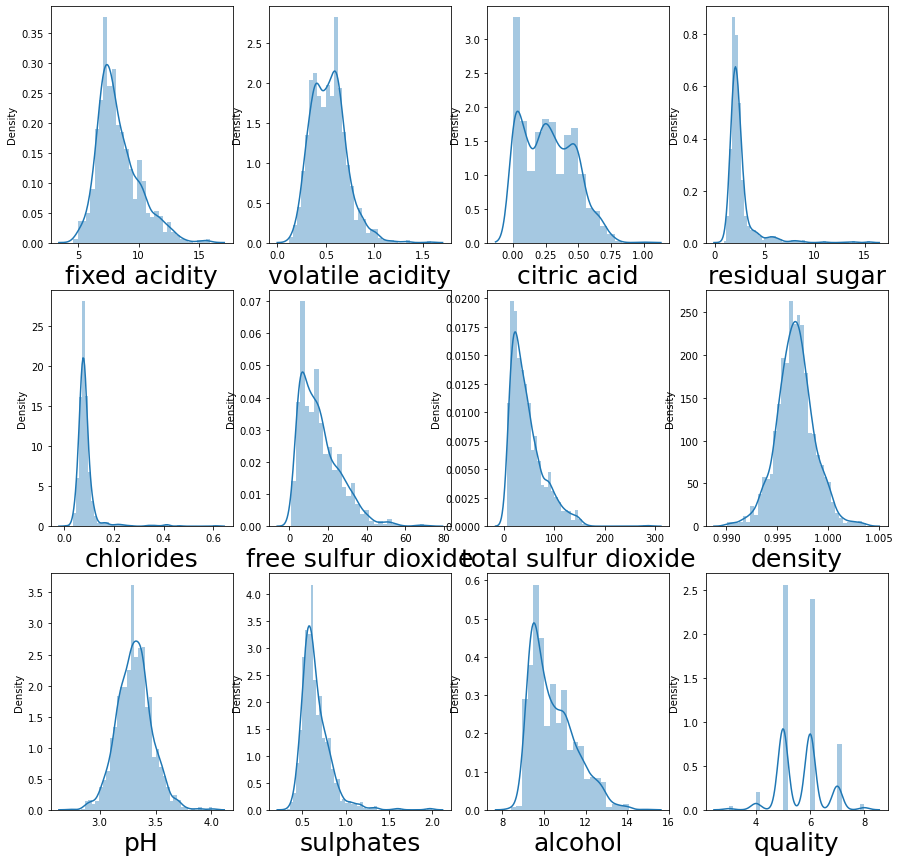

In [745]:
#It will visualize the data distribution through distribution plot

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1


#for columns in data.columns.values:
for column in data:
    if plotnumber<=12:
        
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

In [746]:
# It will provide relationship between feature and the target column

data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

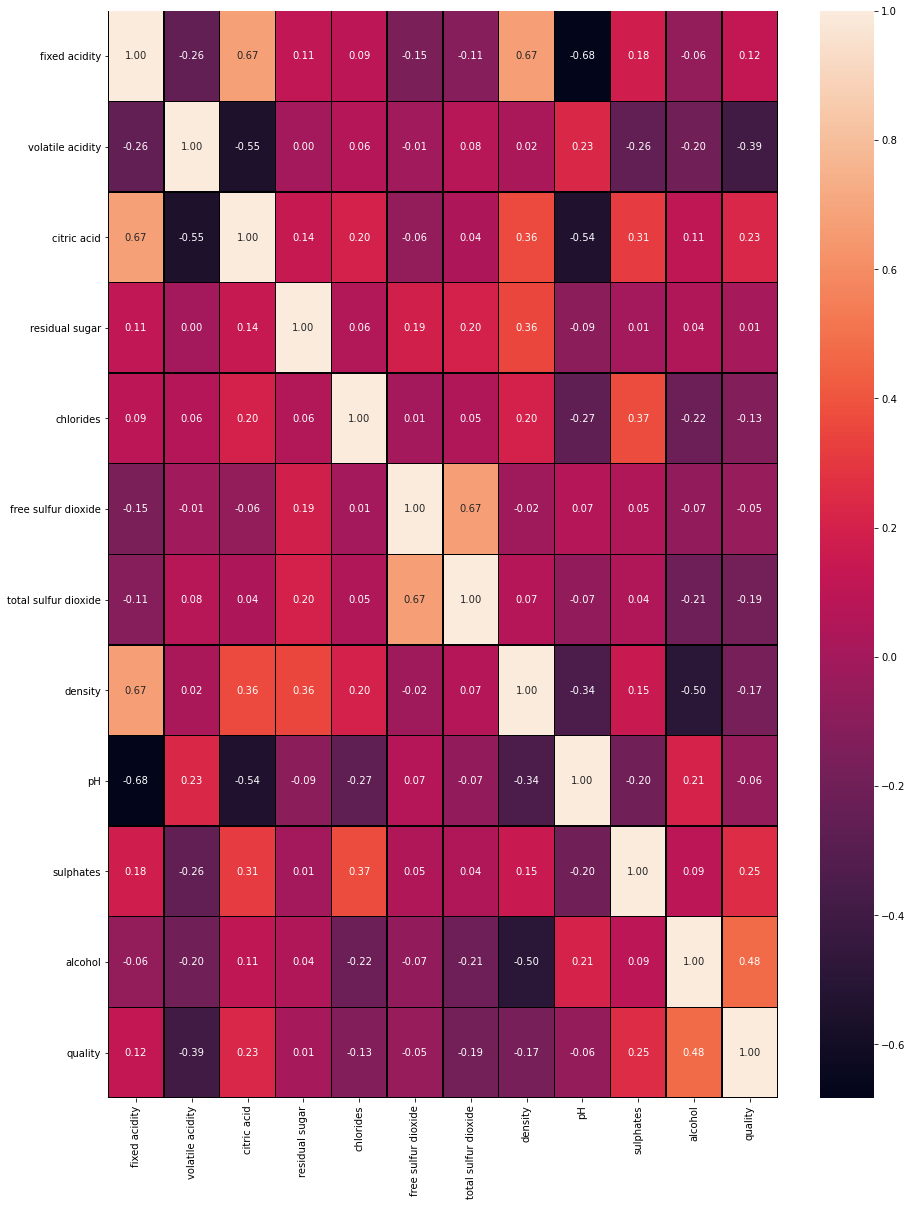

In [747]:
#we can visualize this correlation between then using heatmap

plt.figure(figsize=(15,20))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

# Outcome of the correlation

In [796]:
# the higgest correlation with the vector has with alcohol i.e 48%
# the least correlation with the vector has volatile acidity,free sulphur dioxide and the total sulphur dioxide so we will drop 
# the column from the dataset
data=data.drop(columns=["volatile acidity","free sulfur dioxide","total sulfur dioxide"],axis=1)
data

,fixed acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,0.99490,3.45,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,0.99512,3.52,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,0.99574,3.42,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,0.99547,3.57,0.71,10.2,5


In [797]:
data.describe()

,fixed acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.270976,2.538806,0.087467,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.194801,1.409928,0.047065,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.000000,0.900000,0.012000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.090000,1.900000,0.070000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.260000,2.200000,0.079000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.420000,2.600000,0.090000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.000000,15.500000,0.611000,1.003690,4.010000,2.000000,14.900000,8.000000


# checking the outliers

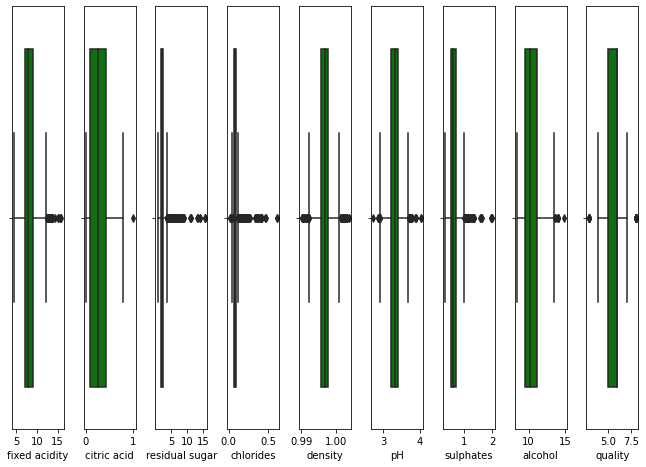

In [798]:
collist=data.columns.values
ncol=30
nrows=14
plt.figure(figsize=(30,90))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

## the features such as[Fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates], has more outliers ,while other feature such as[citric acid,alcohol]has less outlier

## while removing outlier we will use Z-score

In [799]:
from scipy.stats import zscore
import numpy as np


In [820]:
z=np.abs(zscore(data))
threshold=3
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(1599, 9)
(1482, 9)


## Percentage Loss

In [801]:
loss_percent=(1599-1482)/1599*100
print(loss_percent)

7.317073170731707


## now we will divide feature and the vectors

In [802]:
#x=data_new.iloc[:,:-1]
#y=data_new.iloc[:,-1]
x=data_new.drop(columns='quality')
y=data_new['quality']

## splitting the dataframe using Train_test_split

In [803]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=31, test_size=.20)

## Find The best model

In [804]:

random_forest = RandomForestClassifier()
#cv = cross_validate(estimator = random_forest, x, y, scoring='accuracy', n_jobs=-1, cv=10, verbose=10, return_train_score=True)

In [805]:
random_forest.fit(x_test, y_test)
y_pred = random_forest.predict(x_train)
accuracy_score(y_train, y_pred)


0.5814345991561182

In [806]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(random_forest,x,y,cv=5)

#now i will take the mean of it

cross_val_score(random_forest,x,y,cv=5).mean()

0.5702111202111202

In [807]:

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print(classification_report(y_test,y_pred,digits=2))

0.5622895622895623
[[ 1  5  4  0  0]
 [ 1 93 34  1  0]
 [ 1 50 66  6  0]
 [ 0  8 18  7  0]
 [ 0  0  1  1  0]]
              precision    recall  f1-score   support

           4       0.33      0.10      0.15        10
           5       0.60      0.72      0.65       129
           6       0.54      0.54      0.54       123
           7       0.47      0.21      0.29        33
           8       0.00      0.00      0.00         2

    accuracy                           0.56       297
   macro avg       0.39      0.31      0.33       297
weighted avg       0.54      0.56      0.54       297



In [808]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(knn,x,y,cv=5)

#now i will take the mean of it

cross_val_score(knn,x,y,cv=5).mean()

0.5047320047320047

In [809]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print(classification_report(y_test,y_pred,digits=2))

0.6195286195286195
[[  0   8   2   0   0]
 [  0 110  18   1   0]
 [  0  52  66   5   0]
 [  0   3  22   8   0]
 [  0   0   1   1   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        10
           5       0.64      0.85      0.73       129
           6       0.61      0.54      0.57       123
           7       0.53      0.24      0.33        33
           8       0.00      0.00      0.00         2

    accuracy                           0.62       297
   macro avg       0.35      0.33      0.33       297
weighted avg       0.59      0.62      0.59       297



In [810]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(lr,x,y,cv=5)

#now i will take the mean of it

cross_val_score(lr,x,y,cv=5).mean()

0.5803667303667304

In [811]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.632996632996633
[[ 2  4  4  0  0]
 [ 2 92 29  6  0]
 [ 1 33 76 11  2]
 [ 2  4  9 17  1]
 [ 1  0  0  0  1]]


In [812]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(dt,x,y)

#now i will take the mean of it

cross_val_score(dt,x,y).mean()

0.47170579670579676

In [813]:

svm_clf=SVC()
svm_clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.632996632996633
[[ 2  4  4  0  0]
 [ 2 92 29  6  0]
 [ 1 33 76 11  2]
 [ 2  4  9 17  1]
 [ 1  0  0  0  1]]


In [814]:
cross_val_score(svm_clf,x,y,cv=51)

#now i will take the mean of it

cross_val_score(svm_clf,x,y,cv=51).mean()

0.566260987153482

In [815]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logreg_cv = GridSearchCV(lr, param_grid, cv = 3)
logreg_cv.fit(x, y)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
Best score is 0.5850202429149797


In [816]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': [10, 25, 50, 100, 150, 200],
                       'max_features':['auto','square','log2'],
                       'max_depth':[1, 2, 3, 4, 5],
                       'criterion':['gini', 'entropy']}

tree_cv = RandomizedSearchCV(random_forest, param_dist, cv = 5)

tree_cv.fit(x, y)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 150, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}
Best score is 0.5763172263172263


In [817]:
best_model = tree_cv.best_estimator_
best_model

RandomForestClassifier(max_depth=5, n_estimators=150)

In [818]:
mod=RandomForestClassifier(criterion='entropy',max_depth=4,max_features='log2',n_estimators=200)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

60.60606060606061


## saving the model

In [790]:
import joblib
joblib.dump(mod,"RedWineQuality.pkl")

['RedWineQuality.pkl']